# Spaceship Titanic Kaggle Challenge
<br>

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

<img src="./Pictures/Titanic.jpeg" alt="Spaceshi Titanic" width="600" align="center"/>


&emsp; &emsp; &emsp; &emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp; &emsp; &emsp; &emsp; Spaceship Titanic from [Doctor Who, Story 189](https://tardismusings.blogspot.com/2018/01/story-189-voyage-of-damned.html)

<br> 

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.



The notebook is structured as follows:
1. [**Import dependencies and load data**](#Section1)
1. [**First shallow analysis of the data**](#Section2)
1. [**Detailed analysis of each feature and its relationship to other features**](#Section2.1)
1. [**Preprocessing of Data**](#Section3)
1. [**Model building and prediction**](#Section4)

<a id="Section1"></a>

# 1. Import dependencies and load data

### 1.1 Install dependencies

In [1]:
%%capture

! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install seaborn
! pip install missingno


# this code is only necessary for Mac M1 Chip
! pip install tensorflow-macos
! pip install tensorflow-metal

### 1.2 Import dependencies

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import seaborn as sns
import missingno as msno

### 1.3 Load the data

In [3]:
train = pd.read_csv("./spaceship-titanic/train.csv")
test = pd.read_csv("./spaceship-titanic/test.csv")

<a id="Section2"></a>

## 2. First shallow analysis of the data

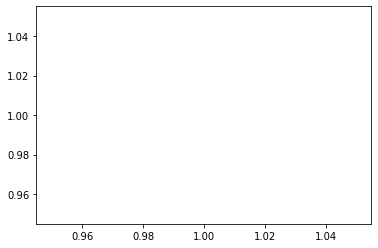

In [4]:
plt.plot(1,1)

### 2.1 Description of the dataset and genreal overview

**train.csv** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

1. **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
2. **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
3. **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
4. **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
5. **Destination** - The planet the passenger will be debarking to.
6. **Age** - The age of the passenger.
7. **VIP** - Whether the passenger has paid for special VIP service during the voyage.
9. **RoomService** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
3. **FoodCourt** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities. 
3. **ShoppingMall** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities. 
3. **Spa** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
3. **VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
10. **Name** - The first and last names of the passenger.
11. **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
---
**test.csv** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set. Same columns as train.csv.


In [5]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
# We can see that CryoSleep and VIP contain boolean values but are saved as objects
# We need to transform them for later analysis
train[["CryoSleep", "VIP"]] = train[["CryoSleep", "VIP"]].astype("boolean")

In [8]:
# Show description of all numeric features
train.describe(include=float).applymap(lambda x: f"{x:0.2f}") # Round to 2 decimals

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.00,8512.00,8510.00,8485.00,8510.00,8505.00
mean,28.83,224.69,458.08,173.73,311.14,304.85
std,14.49,666.72,1611.49,604.70,1136.71,1145.72
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,19.00,0.00,0.00,0.00,0.00,0.00
50%,27.00,0.00,0.00,0.00,0.00,0.00
75%,38.00,47.00,76.00,27.00,59.00,46.00
max,79.00,14327.00,29813.00,23492.00,22408.00,24133.00


In [9]:
# Show all categorical and boolean features
train.describe(include=[object, bool])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
count,8693,8492,8476,8494,8511,8490,8493,8693
unique,8693,3,2,6560,3,2,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall,True
freq,1,4602,5439,8,5915,8291,2,4378


**Coulourcoded Pairplots of numeric data**

We will now take a look at the numeric columns as a whole with pairplots, while colourcoding datapoints by their respective Transportation-status. As we can see from the plot below, the columns referring to the expenses on deck are strongly skewed to the right. So there are a lot of 0/low expenses and some very high outliers. Since these datacolumns represents strictly positive amounts, we can log-transform them to get a better overview of possible differences in the distribution of expenses of "Transported" and "Non-Transported" guests.

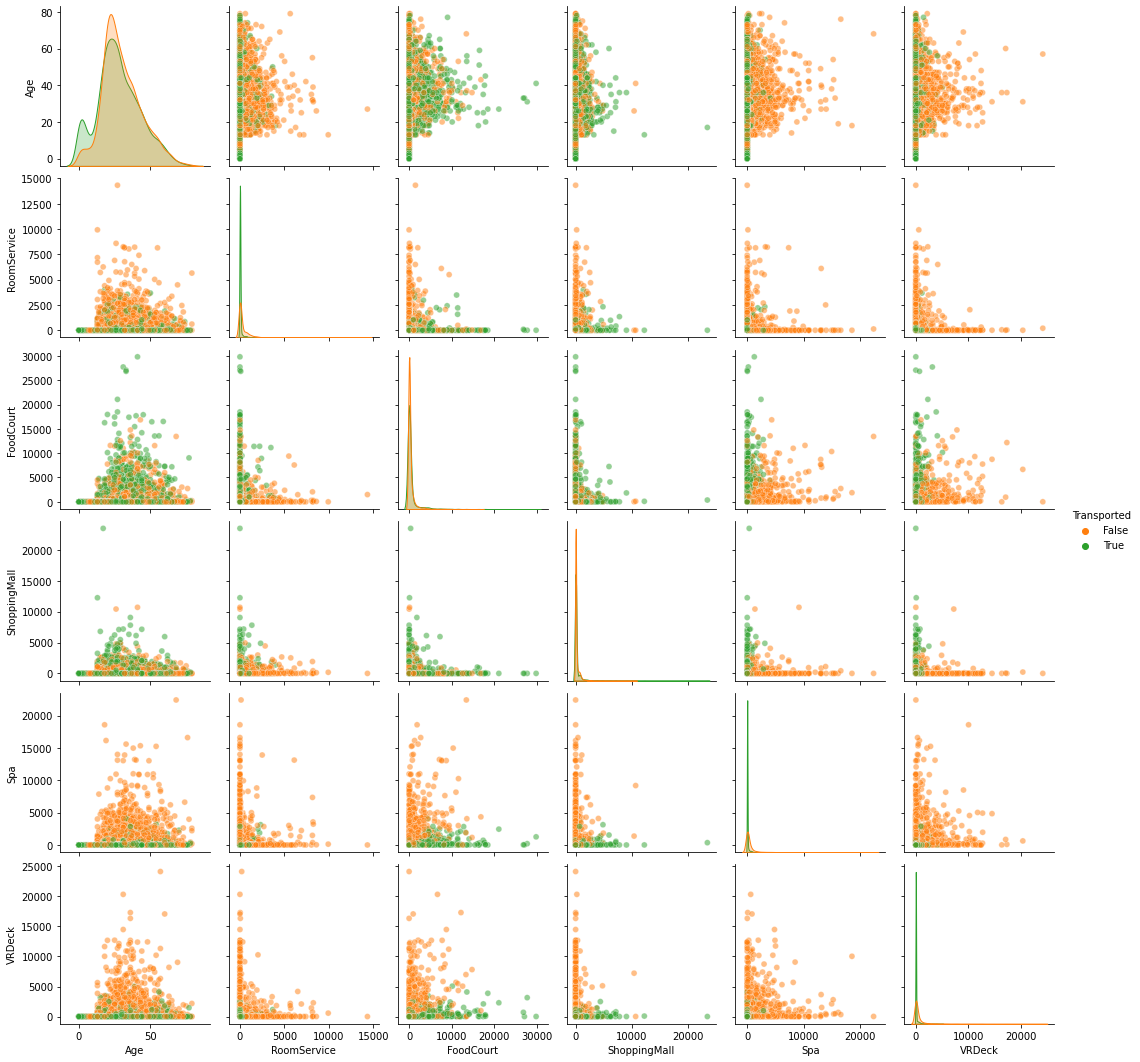

In [10]:
sns.pairplot(train.drop(["CryoSleep", "VIP"],axis=1), hue="Transported", palette=["C1", "C2"], 
             kind="scatter",
             diag_kind="kde",
             plot_kws={'alpha': 0.5})
plt.show()

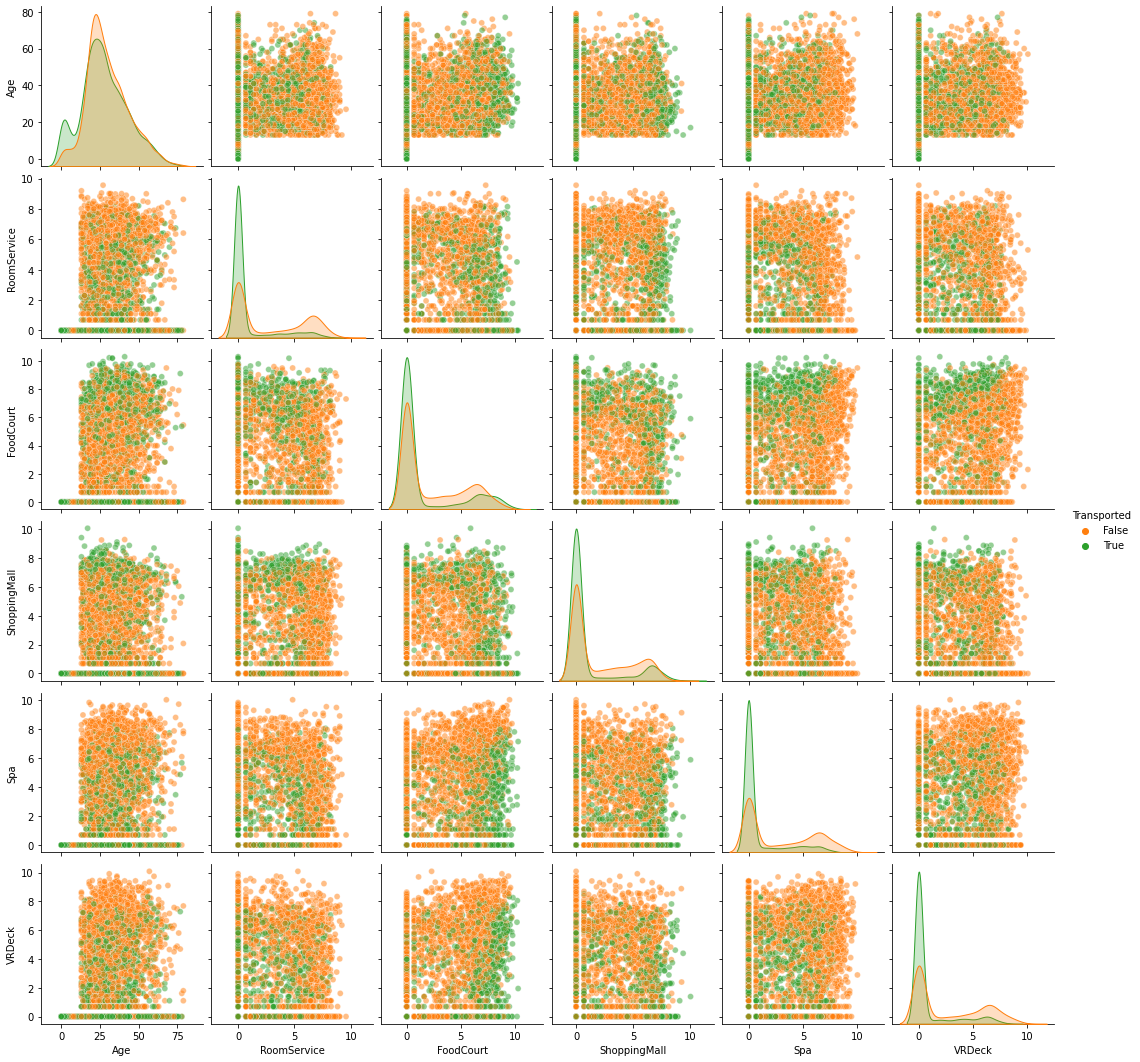

In [11]:
# Log-transform data and plot pairplots
log_train = train.copy()
to_log_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

log_train[to_log_cols] = log_train[to_log_cols].apply(lambda col: np.log(col+1), raw=True, axis=1)

sns.pairplot(log_train.drop(["CryoSleep", "VIP"],axis=1), hue="Transported", palette=["C1", "C2"], 
             kind="scatter",
             diag_kind="kde",
             plot_kws={'alpha': 0.5})
plt.show()

From the first overview of the diagonal elements, we can conclude, that guests who were transported have a higher probability mass in their KDE-plots on lower expenses. Vice versa we can see, that guests that were not transported have more probability mass at higher expenses. So there could be a causal relationship between the target variable and the amount of money people spent on deck. Guests with higher budgets seem to be less likely to being transported. We should investigate this in more detail later in the analysis, also connecting it with the VIP-status. 

All other scatterplots are too messy to gain any insight from this small overview. In general it will be intersting to analyze, whether there are any relationships between the expense-categories (people using RoomService are eating less at the food court, ...) or whether there are no interesting relationships and it is enough to just look at total expenses as the sum of all the expenses on deck.

### 2.2 Check for NaN-values

Now we will turn to the NaN-values. What we want to know in this part of the analysis is:

   1. How many NaN-values are there?
   2. Are there rows with a very high number of NaN-values, we should drop?
   3. How are they distributed? 
   4. Are there any obvious patterns? Is there a relationship/correlation between NaN-positions? (so if one column value is missing, another one is missing with a high probability too)

In [12]:
print(f"Number of rows:                       {len(train)}")
print(f"Number of rows with >= 1 NaN-value:   {(train.isna().any(1).sum())}")
print(f"\nPercentage of 'full'-rows:            {100-(train.isna().any(1).sum()/len(train))*100:.2f}%")

Number of rows:                       8693
Number of rows with >= 1 NaN-value:   2087

Percentage of 'full'-rows:            75.99%


<AxesSubplot:>

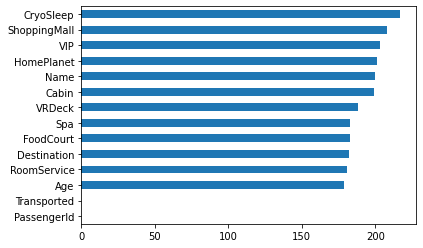

In [13]:
train.isna().sum().sort_values().plot(kind="barh")

All columns show more or less equal amounts of NaN values (~2%) - besides Target variable and PassengerID which are 100% filled with data. 

Now let's take a look at the positions of NaN-values inside the columns:

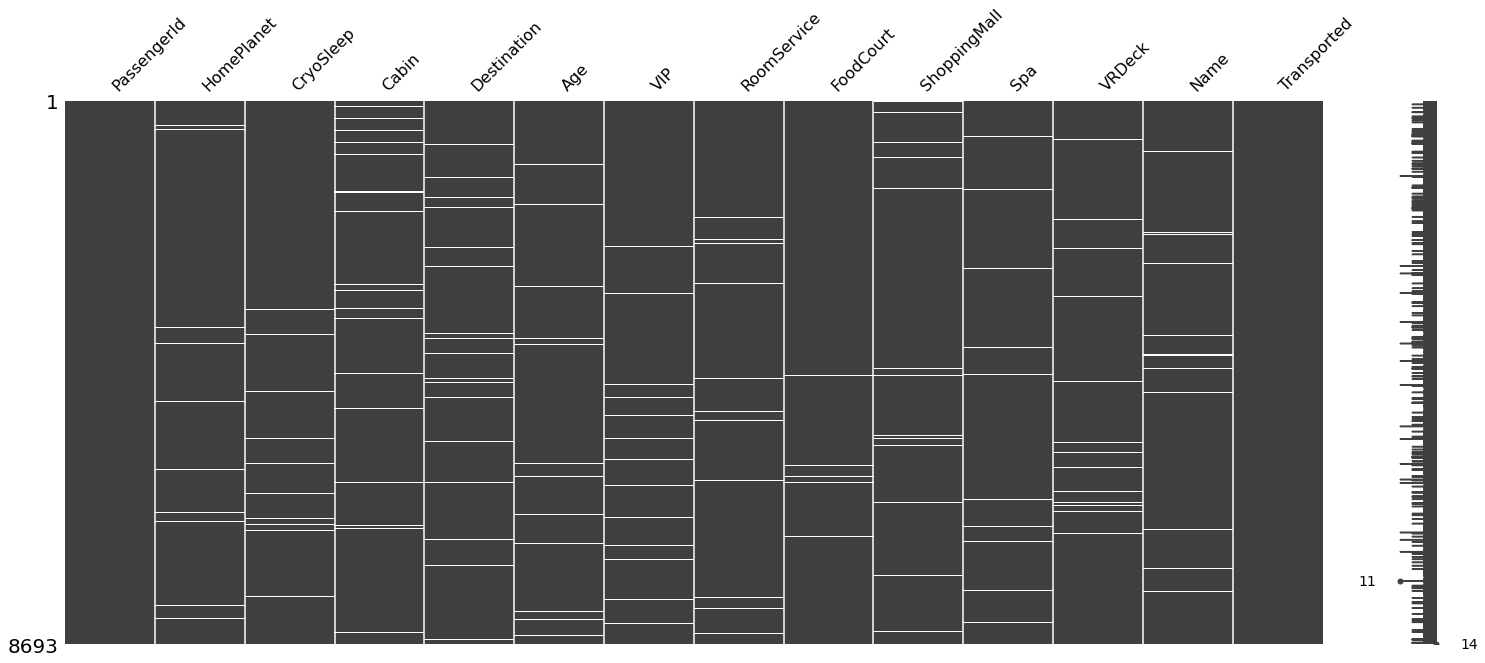

In [14]:
msno.matrix(train)
plt.show()

In [15]:
# Get relative occurence of number of NaNs in rows
(train.isna().sum(1)).value_counts(normalize=True)[1:]

1    0.214771
2    0.023352
3    0.001956
dtype: float64

We can see that there is a minimum of 11 non-NaN-values always present out of the 14 features so in one row a maximum of three values are missing, which is only rarely the case. 
- Most of the rows have all data, (\~76%)
- many are missing one value (\~21.5%), 
- some are missing two values (\~0.23%), 
- very few are missing three values (<0.02%).

Now we will take a look at possible correlations among NaN-values. To get a better overview, we summarize all expenses on deck to one new column "total_expenses". Also, we drop all rows which do not have any NaN-values, since they will increase the equality of two compared columns (since 76% of the rows will have the same value, 1, indicating an existing value). This process will lead to higher, easier to see correlations as when diluting with a high number of similar values. 

Here are the interpretations of the (extreme) correlations for NaN-values:
- -1: If NaN in this column, definetly not NaN in other column
-  0: Absence of value has no correlation woth absence in other column
-  1: If NaN in one column then definetly NaN in other column too 

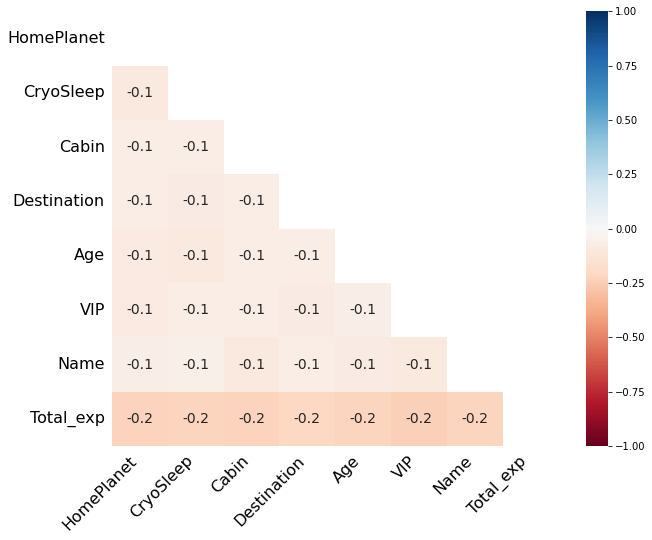

In [16]:
# Now look at NaNs in total_expenses instead of every one on their own (higher chance of seeing correlation):
nan_corr = train.drop(["PassengerId", "Transported"], axis=1)
nan_corr["Total_exp"] = train.iloc[:, [7,8,9,10,11]].sum(axis=1, skipna=False)

# Drop the single expense categories
nan_corr = nan_corr.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1)

plt.figure(figsize=(10,8))
msno.heatmap(nan_corr[nan_corr.isna().any(1)], ax=plt.gca())
plt.show()

**Findings of NaN-Analysis:**
- PassengerId and Transported (target variable) have no missing values
- in general rows all have >= 11 values so <= 3 missing values in total, for the most part, so deletion of rows does not make any sense
- there is no correlation between the occurence of missing values in different columns, all correlations are <0.25 (so no pattern was found regarding the distribution of missing values)

### 2.3 First overview over possible correlations

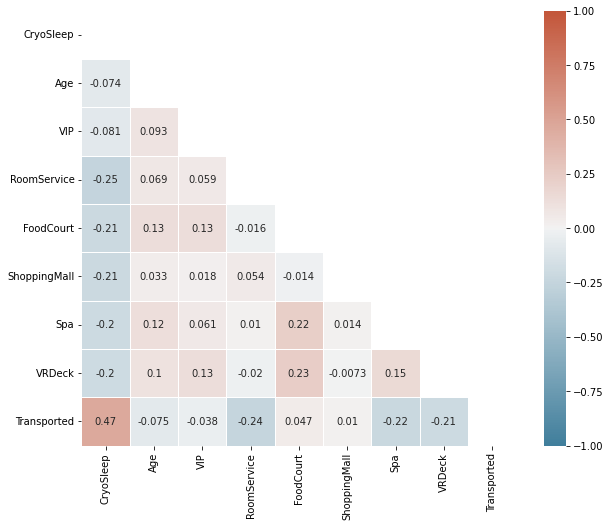

In [17]:
plt.figure(figsize=(10,8))

mask = np.triu(np.ones_like(train.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True, cmap=cmap, mask=mask, square=True, linewidths=.5)
plt.show()

From this correlation plot, we can already extract some information/theories, that we can investigate during the detailed analysis of the features. The following relationships seem interesting:

- CryoSleep and Transported have the highest (positive) correlation found in the dataset, indicating that passengers that were in a state of CryoSleep were likely to get transported and vice versa
- CryoSleep and all of the expense categories seem to be slightly negative correlated, suggesting that passengers in CryoSleep did spend less (which makes sense since they were sleeping the entire time)
- RoomService, Spa and the VRDeck are slightly negatively correlated with the target variable, so we should investigate whether passengers using spending more in these areas were more likely of not being transported (Maybe since they were more privileged? So had nicer cabins in other part of the ship?) 


TODO:
- Who are the people booking CryoSleep? VIP? From which planet?
- Is it true, that everyone spends money in FoodCourt and Mall but only priviledged people were using Spa,VRDeck and RoomService? Is there a clear relationship to the target?
Note: Interesting is that the VIP status is not correlated to the target variable - even though we would think that VIPs also spend a lot for RoomService/Spa/VRDeck. We should investigate this in more detail. 
<br>
<br>

<a id="Section2.1"></a>

## 3. Detailed analysis of each feature and its relationship to other features

In this part of the analysis we will dive deeper into each feature to further investigate the already acquired theories and explore new ones. We will exclude the name and cabin in the first part and will take a look at them in the end (for possible further features and relationships). Before, we add the column "total_exp" as a sum of all expenses.

In [18]:
train["total_exp"] = train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(1)

### 3.1 PassengerID 
> A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

In [19]:
print(f"The train dataset contains {len(train)} records of passengers.")

The train dataset contains 8693 records of passengers.


In [20]:
train.PassengerId.value_counts().max()
# Every PassengerID is unique

1

In [21]:
train.PassengerId.head(5)

0    0001_01
1    0002_01
2    0003_01
3    0003_02
4    0004_01
Name: PassengerId, dtype: object

**Decide on preprocessing of variable**

We transform the column containing the PassengerId on string-format into three new columns:
1. GroupID (int)   - Unique ID of the group the passenger is in
2. GroupPos (int) - Position in the group, that is assigned to passenger
3. GroupSize (int) - New feature, that assigns each passenger the size of the group he is part of

In [46]:
def preprocess_PassengerId(data):
    """
    Preprocess PassengerID. Returns three columns:
        1. GroupID   - Unique ID of the group the passenger is in
        2. GroupPos  - Position in the group, that is assigned to passenger
        3. GroupSize - New feature, that assigns each passenger the size of the group he is part of
    """
    
    new_ID = data.PassengerId.str.split("_", expand=True)
    new_ID.columns = ["GroupID", "GroupPos"]
    new_ID.GroupPos = new_ID.GroupPos.str.replace("0","").astype(int)
    
    # Get dictionary of ID to GroupSize (extract max GroupPos from positions in unique ID)
    group_size_dict = new_ID.groupby("GroupID").max().to_dict()["GroupPos"]
    
    # Assign group size to each row from dict
    new_ID["GroupSize"] = new_ID.apply(lambda row: group_size_dict[row["GroupID"]], axis=1)
    
    # Delete preceeding 0s from GroupID
    new_ID.GroupID = new_ID.GroupID.str.replace(pat=r"\b0+(?=\d)", repl="", regex=True).astype(int)
    
    return new_ID

temp_ID = pd.concat([train, preprocess_PassengerId(train)], axis=1)
temp_ID.head().iloc[:,-3:]

,GroupID,GroupPos,GroupSize
0,1,1,1
1,2,1,1
2,3,1,2
3,3,2,2
4,4,1,1


**Findings:** 
- Since there are 8693 passengers, and the ID starts from 1 and increases the count, some numbers have been skipped. Why? TO DO!
- What is the meaning of "_01" and "_02" in the end of the ID? Possible new feature? It stands for the number inside the group

**Analyze amount/size of groups and position in the group**

In [48]:
# Count the number of groups for each size
group_size_counts = temp_ID.groupby("GroupID")["GroupSize"].max().value_counts().reset_index()
group_size_counts.columns = ["GroupSize", "Counts"]


print(f"Total number of groups: {group_size_counts.Counts.sum()}\n")
print(f"Overview of group size and respective count:\n")
print(group_size_counts)

Total number of groups: 6217

Overview of group size and respective count:

   GroupSize  Counts
0          1    4805
1          2     841
2          3     340
3          4     103
4          5      53
5          7      33
6          6      29
7          8      13


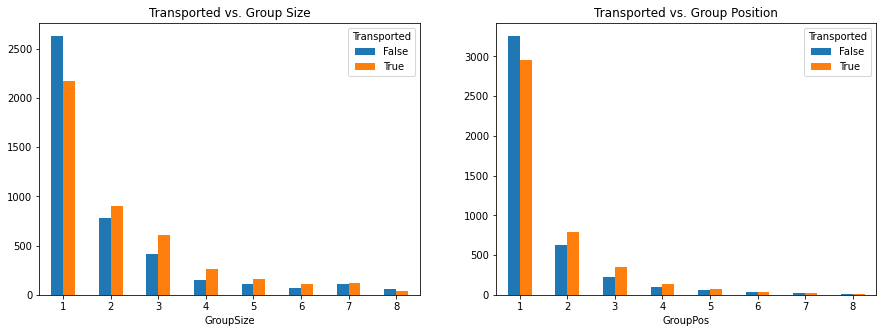

In [28]:
# Plot who was transported depending on the group size and position in the group
plt.figure(figsize=(15,5))
plt.subplot(1,2,1) 

# Plot GroupSize vs. Transported
temp_ID.groupby("GroupSize")["Transported"].value_counts().unstack().plot(kind="bar", rot=0, title="Transported vs. Group Size", ax=plt.gca())

plt.subplot(1,2,2)

# Plot GroupPos vs. Transported
temp_ID.groupby("GroupPos")["Transported"].value_counts().unstack().plot(kind="bar", rot=0, title="Transported vs. Group Position", ax=plt.gca())
plt.show()

We can see, that people travelling alone are a little more likely to not being transported. Vice versa, passengers who are on the ship together with a group (most of them as families) are slightly more likely to get transported. 

From the second plot it is also obvious, that the passenger postition in the group has no real influence on the transportation. It shows a similar relationship to the target variable as the GroupSize. But it could be interesting to look at the age too, to see whether the age of the transported person is important (so are children more likely to be transported?).

In [ ]:
# Plot Age vs. GroupSize/Pos  
plt.figure(figsize=(15,5))
plt.subplot(1,2,1) 
plt.title("GroupSize vs. Age")
sns.boxplot(data=temp_ID, x="GroupSize", y="Age", hue="Transported", ax=plt.gca(), palette="muted")
plt.subplot(1,2,2)
plt.title("GroupPos vs. Age")
sns.boxplot(data=temp_ID, x="GroupPos", y="Age", hue="Transported", ax=plt.gca(), palette="muted")
plt.show()

We can clearly see, that for people travelling alone or in a group of two (most likely with their partner/friend in a similar age group), the likelihood of being transported is very similar among the different ages. Also, it gets apparent that groups of 1/2 are formed by a tighter age group (75% around 20-40), than bigger groups who also include more younger passengers. 

An interesting conclusion can be drawn especially about groups of 3/4 passengers: In these groups younger passengers were more likely to being transported in comparison to older ones. 

**Funny note:** Every passenger group size has babys, so guests declared to be 0 ages old. There are even infants travelling alone!



As we have seen, especially the Group_size seems so have (some) influence on the Transported-variable. But we have to keep in mind, that both new columns, GroupPos and GroupSize, have a high correlation (0.75). So it could make sense to only include one of them in the final model (so to drop GroupPos).

### 3.2 HomePlanet
> The planet the passenger departed from, typically their planet of permanent residence.

<AxesSubplot:title={'center':'HomePlanet vs. Transported'}, xlabel='HomePlanet'>

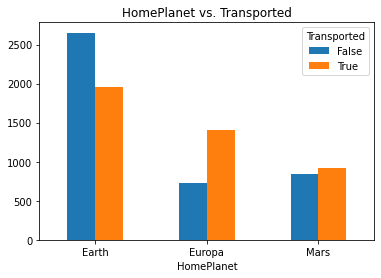

In [49]:
train[["HomePlanet", "Transported"]].groupby("HomePlanet").value_counts().unstack().plot(kind="bar", 
                                                                                         rot=0, 
                                                                                         title="HomePlanet vs. Transported")

<AxesSubplot:title={'center':'HomePlanet vs. CryoSleep'}, xlabel='HomePlanet'>

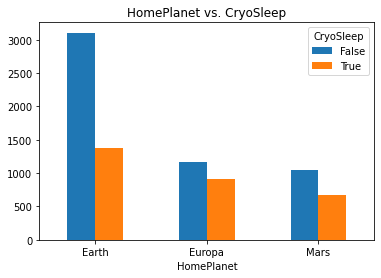

In [50]:
train[["HomePlanet", "CryoSleep"]].groupby("HomePlanet").value_counts().unstack().plot(kind="bar", rot=0, title="HomePlanet vs. CryoSleep")

In [51]:
train.VIP.value_counts()

False    8291
True      199
Name: VIP, dtype: Int64

In [ ]:
train[["HomePlanet", "VIP"]].groupby("HomePlanet").value_counts().unstack().plot(kind="bar", rot=0, title="HomePlanet vs. CryoSleep")

In [ ]:
hi = train.iloc[:, [1,2,7,8,9,10,11]]
hi[hi.CryoSleep==True]

In [ ]:
home_expenses = train.iloc[:, [1,7,8,9,10,11]]
all_expenses = home_expenses.iloc[:, 1:].sum(axis=1)

all_expenses_by_home = pd.concat([home_expenses.HomePlanet, all_expenses.rename("AllExpenses")], axis=1).groupby("HomePlanet").mean()

all_expenses_by_home.sort_values("AllExpenses", ascending=False).plot(kind="bar", ylabel="Avg. expenses on board")

In [ ]:
# Now we exclude the ones in CryoSleep because they cannot pay that much since they are bound to their cabin
expenses_home_cryo = pd.concat([train[["HomePlanet", "CryoSleep"]], all_expenses.rename("AllExpenses")], axis=1)

results_cryo_expenses = expenses_home_cryo.pivot_table(index="HomePlanet", columns="CryoSleep", values="AllExpenses", aggfunc="mean")
print(results_cryo_expenses.round())

# We can see that no expenses are done in CryoSleep! Now the averages for paying visitors are even higher:
results_cryo_expenses.iloc[:,0].sort_values(ascending=False).plot(kind="barh", rot=0)

**To-Do:**
- for each of the three home planets show distribution of some important features together with Trans/Not Trans in different colours in one plot (3 rows, 4 cols, each plot two groups) to identify different groups 
- for imputation of CryoSleep and vice versa: where expenses are 0 -> CryoSleep = 1, CryoSleep=1 -> expenses 0

In [ ]:
cryo_expenses.CryoSleep.isnull().sum()
cryo_expenses[0].isnull().sum()

In [ ]:
cryo_expenses[cryo_expenses.CryoSleep.isnull()]

In [ ]:
cryo_expenses[cryo_expenses.isna().any(1)]

In [ ]:
# Compute all expense but keep NaN if one is NaN
all_expenses_NaN = home_expenses.iloc[:, 1:].sum(axis=1, skipna=False)
cryo_expenses = pd.concat([train.CryoSleep, all_expenses_NaN], axis=1)

print(len(cryo_expenses[cryo_expenses.isna().any(1)])) # Total where one or both are NaN
print(cryo_expenses[cryo_expenses.CryoSleep.isna() &  ~cryo_expenses[0].isna()].shape[0]) # Can be 100% resolved
print(cryo_expenses[cryo_expenses[0].isna() &  cryo_expenses.CryoSleep==True].shape[0]) # Can be 100% resolved

In [ ]:
# TO-DO: Do it in nicer way!
hi = train.iloc[:, [1,2,7,8,9,10,11]].copy()
hi[hi.CryoSleep==True]

In [ ]:
hi["Total_exp"] = hi.iloc[:, 2:].sum(axis=1, skipna=False)
nan_expenses = hi[hi.Total_exp.isna()]
nan_expenses[nan_expenses.CryoSleep == True] # CryoSleep + NaN in expenses? - 347 rows: just fill in 0 for each expense

# NaN CryoSleep + Expenses not NaN: -> True is ==0, False if >0
# NaN CryoSleep + Expenses NaN:  1) only zeros other than NaN? -> CryoSleep=True, RestExp=0
#                                2) at least one value >0? -> CryoSleep=False, RestExp=mean of HomePlanet (TO-DO)
nan_expenses[nan_expenses.CryoSleep.isna()]

#### 2.3.3 CryoSleep

#### 2.3.4 Cabin

#### 2.3.5 Destination

#### 2.3.6 Age

In [ ]:
hi = pd.concat([group_size_df.drop(["ID"], axis=1), train.Transported, train.Age], axis=1)
hi[(hi.Age==0) & (hi.Group_pos==1) & (hi.Group_size==1)]
# Age 0 and travelling alone

#### 2.3.7 VIP

In [ ]:
train.VIP.value_counts().plot(kind="barh")

In [ ]:
total_exp_vip = pd.concat([pair_total_exp, train.VIP], axis=1)
sns.jointplot(
    data=total_exp_vip[total_exp_vip.TotalExp>0],
    x="Age", y="TotalExp", hue="VIP",
    kind="kde",
)

In [ ]:
sns.kdeplot(data=total_exp_vip[total_exp_vip.VIP==True], x="Age")
sns.kdeplot(data=total_exp_vip[total_exp_vip.VIP==False], x="Age")
# both very similar but together:

In [ ]:
sns.kdeplot(data=total_exp_vip, x="Age", hue="VIP", palette=["C0", "C1"])

In [ ]:
# If common_norm=True (default), the data is seen as one full sample and the probability of belinging to one class
# or the other will of course also be taken into account (s.t. the integral of both kdes equals 0 - joint distribution)
# With common_norm=False, we get two seperated kdes, which both individually sum up to one (easier to compare but fact
# that one class is smaller is not visible) In case of True, it is just a mixture of kdes (which are also
# gaussian mixtures themselves)
sns.kdeplot(data=total_exp_vip, x="Age", hue="VIP", common_norm=False, palette=["C0", "C1"])

In [ ]:
a = np.random.normal(10, 2, size=100)
b = np.random.normal(20, 4, size=100)

sns.kdeplot(a)
sns.kdeplot(b)
sns.kdeplot(np.concatenate([a, b]))
# Spread of second is double thats why magnitude is half
# Here we can clearly see two different popoulations, kde is half since we have two and each of them sums to 1!
# Basically 200 Normals are build (100 result in first density 100 in second)

In [ ]:
sns.kdeplot(np.concatenate([a, b]))

#### 2.3.8 RoomService

#### 2.3.9. FoodCourt

#### 2.3.10 ShoppingMall

#### 2.3.11 Spa

#### 2.3.12 VRDeck

#### 2.3.13 Name

#### 2.3.14 Transported - Target Variable

**TO-DO: Put this analysis first.**

### Other stuff

In [ ]:
a = [0.5, 1, 2, 3, 5, 7, 9, 10, 15, 25, 50, 60, 100, 190, 300, 500, 1300, 1400, 2500]
#plt.hist(a, bins=30)

import numpy as np

plt.hist(np.log(a))

In [ ]:
# Normal scale
plt.hist(train.Spa[train.Spa>0], bins=70)
plt.show()

In [ ]:
# Log scale
plt.hist(np.log(train.Spa[train.Spa>0]), bins=70)
plt.show()

In [ ]:
# Same in sns
sns.set(style = "darkgrid")
scatt = sns.scatterplot(x=train.Spa, y=train.Age, hue=train.Transported)
#scatt.set(ylabel=None)

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)

In [ ]:
%matplotlib inline

sc = plt.scatter(x=train.Spa, y=train.Age, c=train.Transported)
plt.legend(*sc.legend_elements())

# Seaborn is way nicer in handling legends with categories

In [ ]:
# All together
plt.figure(figsize=(10,7))
scatt = sns.scatterplot(x=np.log(train.Spa+1), y=train.Age, hue=train.HomePlanet, style=train.Transported, alpha=0.7)

In [ ]:
# Seperated
home_pl = train.groupby("HomePlanet")
i=1
fig = plt.figure(figsize=(10,15))
for key, df in home_pl:
    plt.subplot(3,1,i)
    sc = sns.scatterplot(x=np.log(df.Spa+1), y=df.Age, hue=train.Transported, palette=["C1", "C2"], alpha=0.7)
    sc.set(title=key)
    i+=1
# color=f"C{i-1}"
fig.subplots_adjust(hspace=0.3)
plt.show()

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
sns.set(style = "darkgrid")
try_it = train
# plt.style.use('default')
# plt.rcParams['figure.figsize'] = [6.4, 4.8]
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

# Create own color mapping
cmap = LinearSegmentedColormap.from_list("My-own", ["r", "g", "b", "y"], N=4)

sc = ax.scatter(try_it.CryoSleep, try_it.VIP, try_it.Age, c=try_it.HomePlanet.astype("category").cat.codes, cmap=cmap, s=50)
ax.set_xlabel("CryoSleep")
ax.set_ylabel("VIP")
ax.set_zlabel("Age")
ax.legend(sc.legend_elements()[0], handles=sc.legend_elements()[0], labels=["NaN", 'Earth', 'Europa', 'Mars'])
#ax.legend(*sc.legend_elements(), title="Transported")
# If not categorical variable
# handles=sc.legend_elements()[0], labels=["NaN", 'Earth', 'Europa', 'Mars']
plt.show()
# Reset default matplotlib settings:
# plt.style.use('default')
# plt.rcParams['figure.figsize'] = [6.4, 4.8]
# C0 is blue, C1 ...

<a id="Section3"></a>

## 3. Preprocess the data

Idea for imputation: kNN?

<a id="Section4"></a>

## 4. Engineer models and predict target variable

#### Compare different Imputation-strategies (What about sampling from KDE?, Multiple-Imputaiton? Gibbs Sampling? EM-Algorithm?), so first 100% imputation and then compare mean/mode with fancier techniques